In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from acquire import get_titanic_data

In [38]:
df = get_titanic_data()

#### Summarize:

- df.head()
- df.info()
- df.describe()
- df.isna().sum()
- df[col].hist()
- df[col].dytpes
- df[col].value_counts()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


In [10]:
df.columns

Index(['passenger_id', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'class', 'deck', 'embark_town', 'alone'],
      dtype='object')

In [39]:
df.select_dtypes(include = 'object')
#looks like embarked and embark_town are the same, lets check.

,sex,embarked,class,deck,embark_town
0,male,S,Third,NaN,Southampton
1,female,C,First,C,Cherbourg
2,female,S,Third,NaN,Southampton
3,female,S,First,C,Southampton
4,male,S,Third,NaN,Southampton
...,...,...,...,...,...
886,male,S,Second,NaN,Southampton
887,female,S,First,B,Southampton
888,female,S,Third,NaN,Southampton
889,male,C,First,C,Cherbourg


In [40]:
# df['embark_town'].apply(lambda x: x[0])


# cant yet do this, this function application breaks if there are nulls

In [41]:
df[['embarked', 'embark_town']]

# looks like these are the same, we will compare after nulls are addressed

,embarked,embark_town
0,S,Southampton
1,C,Cherbourg
2,S,Southampton
3,S,Southampton
4,S,Southampton
...,...,...
886,S,Southampton
887,S,Southampton
888,S,Southampton
889,C,Cherbourg


In [42]:
#using boolean masking -> which info is missing from which column?

df.isna().sum()[df.isna().sum() >0]

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

In [43]:
#sum of nulls / length of the df, we see percentages of missing data in the df

df.isna().sum()[df.isna().sum() >0] / len(df)

age            0.198653
embarked       0.002245
deck           0.772166
embark_town    0.002245
dtype: float64

In [44]:
# colclusions from this process:

# - deck is useless, over 77% of data missing
# - age has almost 20% missing, may or may not want to use this.
#      - in this situation we need to investage more through alaysis to determine.
# - embark/embark_town still look the same

In [45]:
#lets see if embark/embark_town truly are the same

df['embark_town'].dropna().apply(lambda x: x[0])
# pull the first letter of embark_town

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embark_town, Length: 889, dtype: object

In [46]:
#the main body of this applies boolean values for embark/embark_town similarity
#adding .mean() at the end, gives us the ammount where boolean value is true (0 - 1, 1 = 100%)

(df['embarked'].dropna() == df['embark_town'].dropna().apply(lambda x: x[0])).mean()

1.0

In [47]:
df.embark_town.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [48]:
#We can fill null valueswith most common value, Southhampton

#We can reassign, or use inplace=True

df.embark_town.fillna('Southampton', inplace = True)

In [49]:
#dropping the redundant embarked column

df = df.drop(columns='embarked')

In [50]:
df.head()

# here we identify another issue to correct = passenger_id is a duplicate of the index
# leaving this can lead to erroneous assumptions when passed through ML algorithms
#      because the id will be treated as a value


# Other takeaways:

# - pclass and class seem to be the same. 
#       - Lets keep pclass since its a number and will be easier to work with.

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,Third,NaN,Southampton,1


In [51]:
df['sex'].dtype == 'O'

True

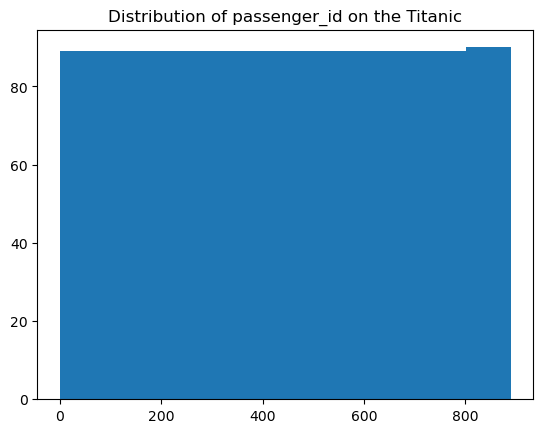

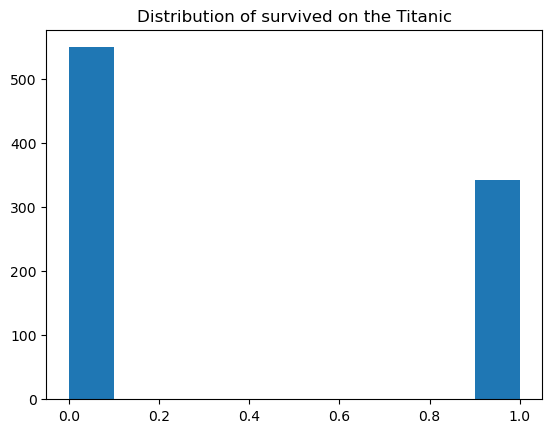

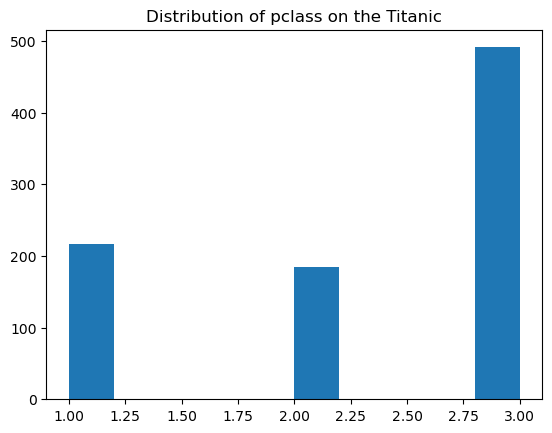

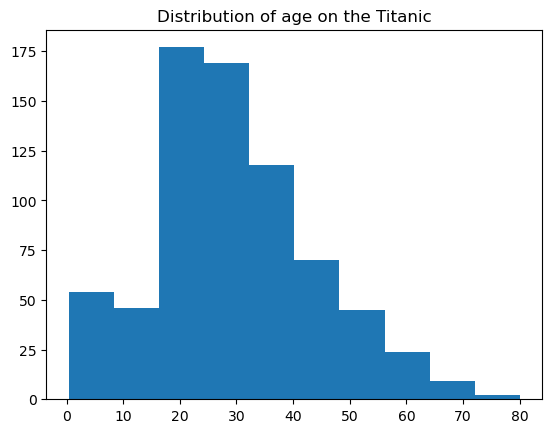

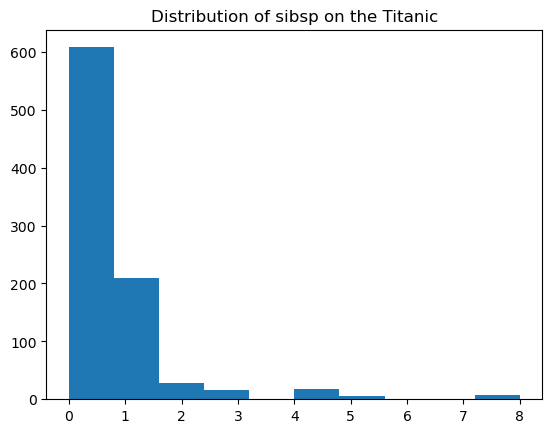

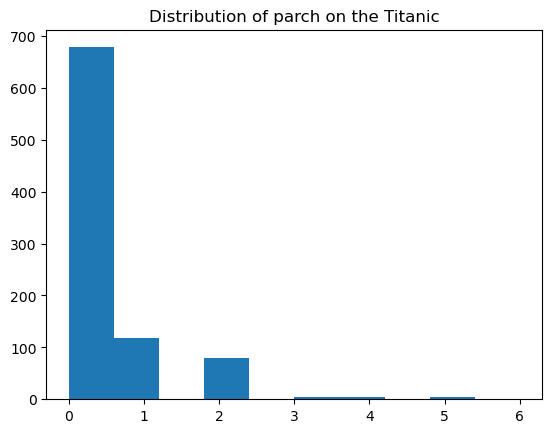

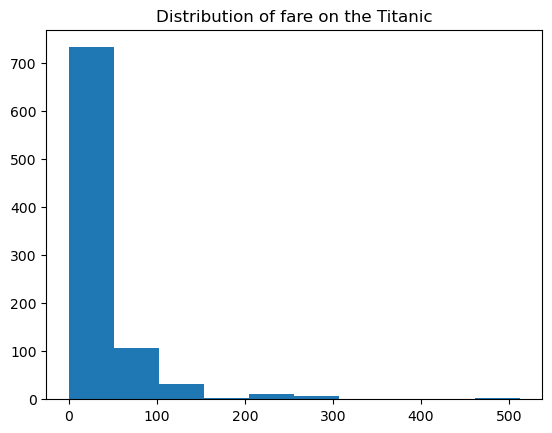

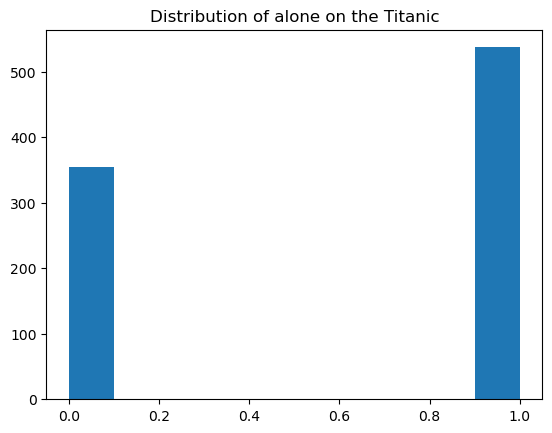

In [52]:
#examine distributions


for col in df:
    if df[col].dtype != 'O': # this removes columns that are 'Object' dtypes
        plt.hist(df[col])
        plt.title(f'Distribution of {col} on the Titanic')
        plt.show()   

In [53]:
# still need to drop class, deck, passenger id and reassign df

df = df.drop(columns=['class', 'deck', 'passenger_id'])

In [54]:
#confirm
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,Southampton,0
1,1,1,female,38.0,1,0,71.2833,Cherbourg,0
2,1,3,female,26.0,0,0,7.9250,Southampton,1
3,1,1,female,35.0,1,0,53.1000,Southampton,0
4,0,3,male,35.0,0,0,8.0500,Southampton,1


In [55]:
#lets give age our avg value to accomodate the ~20% missing values

df['age'] = df['age'].fillna(df.age.mean())

In [56]:
df.info()
#now we see the miising values have been addressed, and redundancies removed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embark_town  891 non-null    object 
 8   alone        891 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 69.6+ KB


In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.000000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.000000,3.0,3.0000
age,891.0,29.699118,13.002015,0.42,22.0000,29.699118,35.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.000000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.000000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.454200,31.0,512.3292
alone,891.0,0.602694,0.489615,0.00,0.0000,1.000000,1.0,1.0000


In [60]:
#introducing pd.get_dummies

#pd.concat takes in a list of two things i want to lue together

#the second is the dummy columns represented by pd.get_dummies() output




pd.concat([df,pd.get_dummies(df['embark_town'], drop_first = True)], axis = 1)

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,Queenstown,Southampton
0,0,3,male,22.000000,1,0,7.2500,Southampton,0,0,1
1,1,1,female,38.000000,1,0,71.2833,Cherbourg,0,0,0
2,1,3,female,26.000000,0,0,7.9250,Southampton,1,0,1
3,1,1,female,35.000000,1,0,53.1000,Southampton,0,0,1
4,0,3,male,35.000000,0,0,8.0500,Southampton,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,Southampton,1,0,1
887,1,1,female,19.000000,0,0,30.0000,Southampton,1,0,1
888,0,3,female,29.699118,1,2,23.4500,Southampton,0,0,1
889,1,1,male,26.000000,0,0,30.0000,Cherbourg,1,0,0


In [63]:
#doing the same as above, but appying to embark_town as well

df = pd.concat([df, pd.get_dummies(df[['sex', 'embark_town']], drop_first = True)], axis = 1)

In [64]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,male,22.0,1,0,7.2500,Southampton,0,1,0,1
1,1,1,female,38.0,1,0,71.2833,Cherbourg,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,Southampton,1,0,0,1
3,1,1,female,35.0,1,0,53.1000,Southampton,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,Southampton,1,1,0,1


In [68]:
def clean_titanic(df):
    '''
    clean titanic will take in a single pandas dataframe and will
    proceed to drop redundant columns and non-usefull info in 
    addition to addressing null values and encoding categorical variables
    '''
    #drop redundancies
    df = df.drop(columns=['class', 'deck', 'passenger_id'])
    
    #impute avg age and most common embark_town:
    df['age'] = df['age'].fillna(df.age.mean())
    df['embark_town'] = df['embark_town'].fillna('Southampton')
    
    # encode categorical values
    df = pd.concat([df, pd.get_dummies(df[['sex', 'embark_town']], drop_first = True)], axis = 1)
    
    return df

In [69]:
clean_titanic(get_titanic_data())

,survived,pclass,sex,age,sibsp,parch,fare,embarked,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,male,22.000000,1,0,7.2500,S,Southampton,0,1,0,1
1,1,1,female,38.000000,1,0,71.2833,C,Cherbourg,0,0,0,0
2,1,3,female,26.000000,0,0,7.9250,S,Southampton,1,0,0,1
3,1,1,female,35.000000,1,0,53.1000,S,Southampton,0,0,0,1
4,0,3,male,35.000000,0,0,8.0500,S,Southampton,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Southampton,1,1,0,1
887,1,1,female,19.000000,0,0,30.0000,S,Southampton,1,0,0,1
888,0,3,female,29.699118,1,2,23.4500,S,Southampton,0,0,0,1
889,1,1,male,26.000000,0,0,30.0000,C,Cherbourg,1,1,0,0


#### SciKitLearn

In [70]:
from sklearn.model_selection import train_test_split

In [77]:
#split our df into train_val and test
#split our train_val into train and validate

train_val, test = train_test_split(df, train_size = 0.8, 
                                    random_state = 1349, 
                                    stratify = df['survived'])    

In [78]:
train_val.shape, test.shape

((712, 12), (179, 12))

In [79]:
train, validate = train_test_split(train_val,
                                  train_size = 0.7,
                                  random_state = 1349,
                                  stratify = train_val['survived'])

In [80]:
train.shape[0] + validate.shape[0] + test.shape[0] == df.shape[0]

True

In [81]:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
474,0,3,female,22.000000,0,0,9.8375,Southampton,1,0,0,1
370,1,1,male,25.000000,1,0,55.4417,Cherbourg,0,1,0,0
573,1,3,female,29.699118,0,0,7.7500,Queenstown,1,0,1,0
110,0,1,male,47.000000,0,0,52.0000,Southampton,1,1,0,1
167,0,3,female,45.000000,1,4,27.9000,Southampton,0,0,0,1


In [88]:
def split_titanic_data(df):
    '''
    split_titanic_data will split data based on values present
    in a cleaned version of Titanic that is from clean_titanic
    
    '''
    train_val, test = train_test_split(df, train_size = 0.8, 
                                    random_state = 1349, 
                                    stratify = df['survived'])
    train, validate = train_test_split(train_val,
                                    train_size = 0.7,
                                    random_state = 1349,
                                    stratify = train_val['survived'])
    return train, validate, test

In [89]:
def prep_titanic(df):
    df = clean_titanic(df)
    return split_titanic_data(df)

In [90]:
#aquire, clean, prep in one line:

train, validate, test = prep_titanic(get_titanic_data())